<a href="https://colab.research.google.com/github/1zulkifel/Reuters_news/blob/master/Reuters_news_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models,layers,utils
import numpy as np
import matplotlib.pyplot as plt


**Downloading Data**

In [ ]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [ ]:
print(len(train_data))
print(len(test_data))

8982
2246


**Preparing Data**

In [ ]:
#Decoding newswires back to text
word_index=reuters.get_word_index()
reversed_index=dict([(value,key)for (key,value) in word_index.items()])
decoded_newswire=''.join([reversed_index.get(1-3,'?') for i in train_data[0]])


557056/550378 [==============================] - 0s 0us/step


In [ ]:
def vectorize_sequence(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1.
  return results
x_train=vectorize_sequence(train_data)
x_test=vectorize_sequence(test_data)




In [ ]:
#one hot endcoding of data classical coding
#def to_one_hot(labels,dimensions):
 # results=np.zeros((len(labels),dimension))
  #for i , label in enumerate(labels):
   # results[i,label]=1.
  #reuturn results
 #one_hot_x_train_label=to_one_hot(train_labels)
 #one_hot_x_test_label=to_one_hot(test_labels)


In [ ]:
#we can do one hot encoding using utils library
one_hot_train_label=utils.to_categorical(train_labels)
one_hot_test_label=utils.to_categorical(test_labels)

In [ ]:
#cross validation , for setting hyperperameter
x_val=x_train[1000:]
partial_x_train=x_train[:1000]
y_val=one_hot_train_label[1000:]
partial_y_train=one_hot_train_label[:1000]

**Buliding Network**

In [ ]:

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Using TensorFlow backend.


**Compilation step **

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
history=model.fit(partial_x_train,partial_y_train,epochs=6,batch_size=512,validation_data=(x_val,y_val))


Train on 1000 samples, validate on 7982 samples
Epoch 1/6
1000/1000 [==============================] - 0s 444us/step - loss: 0.0087 - acc: 0.9960 - val_loss: 2.8550 - val_acc: 0.7023
Epoch 2/6
1000/1000 [==============================] - 0s 377us/step - loss: 0.0057 - acc: 0.9960 - val_loss: 2.8622 - val_acc: 0.7007
Epoch 3/6
1000/1000 [==============================] - 0s 373us/step - loss: 0.0075 - acc: 0.9960 - val_loss: 2.8621 - val_acc: 0.6977
Epoch 4/6
1000/1000 [==============================] - 0s 358us/step - loss: 0.0054 - acc: 0.9960 - val_loss: 2.8184 - val_acc: 0.7043
Epoch 5/6
1000/1000 [==============================] - 0s 371us/step - loss: 0.0056 - acc: 0.9960 - val_loss: 2.8268 - val_acc: 0.7045
Epoch 6/6
1000/1000 [==============================] - 0s 362us/step - loss: 0.0048 - acc: 0.9970 - val_loss: 2.8642 - val_acc: 0.7035


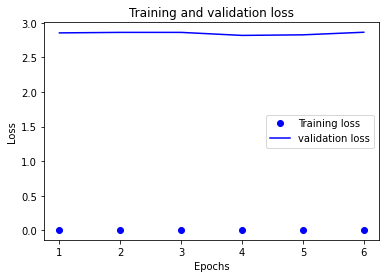

In [ ]:
#Plotting the training and validation loss
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

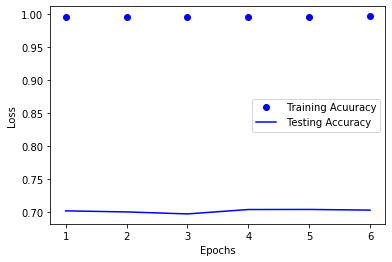

In [ ]:
#Plotting the training and validation accuracy

acc=history.history['acc']
val_acc=history.history['val_acc']
epochs=range(1,len(loss)+1)
plt.plot( epochs, acc, 'bo', label=' Training Acuuracy')
plt.plot( epochs, val_acc, 'b', label=' Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
prediction=model.predict(x_test)
prediction

array([[3.32414326e-12, 3.81973064e-11, 6.77053465e-13, ...,
        4.73962842e-14, 1.21779214e-14, 4.27004921e-13],
       [7.57962139e-03, 2.01893272e-05, 1.42574427e-04, ...,
        4.50589956e-12, 6.90189974e-15, 7.35240576e-07],
       [1.64888334e-05, 9.91869450e-01, 2.62248562e-07, ...,
        2.47407594e-10, 6.57146004e-11, 2.33031141e-08],
       ...,
       [7.09361443e-13, 4.95965628e-13, 8.39803945e-15, ...,
        1.23380437e-14, 3.49675611e-13, 1.50500211e-15],
       [8.13117314e-13, 6.27849786e-11, 3.38518009e-15, ...,
        3.64312259e-13, 1.79349168e-12, 6.08761834e-14],
       [2.04819764e-04, 2.13338574e-03, 1.05846848e-04, ...,
        2.48070009e-08, 1.93565497e-09, 3.84549412e-06]], dtype=float32)

In [ ]:
prediction.shape

(2246, 46)

In [ ]:
prediction[0].sum()

0.99999994